# orbit-generation

> A library to handle and generate orbit data

This library has been built using [nbdev](https://nbdev.fast.ai/), which means that the source code of the library is stored in Jupyter notebooks inside the [`nbs`](../nbs/) folder. These notebooks are then automatically converted into Python files inside the [`orbit_generation`](../orbit_generation/) folder.  

Apart from the library, we have included research experiments using the library in the [`nbs_experiments`](../nbs_experiments/) folder.  

First, we will review the library structure, functions, and finally, we will explain the experiments conducted.


## Structure

```text
.
|-- .devcontainer: Configuration for the development container.  
|  
|-- .github: workflows for continuous integration in Git.  
|  
|-- data: The folder where datasets are stored, in GitHub only example data is included. 
|   |-- example_data
|   |-- orbits_fix_1500 (needs to be downloaded)
|
|-- docs: Documentation files for the project. 
|
|-- experiments: Results about the experiments performed. 
|
|-- index_files: Auto-generated images to be used in the README.md. 
| 
|-- julia: Scripts written in Julia for specific computations. 
|   `-- convergence_algorithm.jl
|
|-- models: Some Machine Learning models used in the experiments.
|   |-- family_classificators
|   |-- orbit_generators
|
|-- nbs: Jupyter notebooks containing the source code for the library.  
|   |-- 00_constants.ipynb
|   |-- 01_data.ipynb
|   |-- 02_orbit_processing.ipynb
|   |-- 03_visualization.ipynb
|   |-- 04_orbit_statistics.ipynb
|   |-- 05_dataset.ipynb
|   |-- 06_architectures.ipynb
|   |-- 07_propagation.ipynb
|   |-- 08_experiment.ipynb
|   |-- 09_evaluation.ipynb
|   |-- 10_vae.ipynb
|   |-- 11_model_factory.ipynb
|   |-- 12_convergence.ipynb
|   |-- 13_latent_space.ipynb
|   |-- 14_paper_specific.ipynb
|   |-- index.ipynb
|
|-- nbs_experiments: Notebooks with research experiments using the library.  
|   |-- 01_generative_discovery_em
|   |-- 02_conditional_generation_systems
|
|-- orbit_generation: Auto-generated Python package containing the processed library code. 
|  
|-- .gitignore: Defines files Git should ignore.
|  
|-- LICENSE: Project license file.  
|  
|-- MANIFEST.in: Specifies which files to include in the package distribution.   
|  
|-- README.md: Documentation for the project, auto-generated from index.ipynb.  
|  
|-- settings.ini: Configuration file for `nbdev`.  
|  
|-- setup.py: Script for installing the package.  

## Library Modules

```sh
pip install orbit_generation
```

### 0. Constants

This module contains physical constants and orbit labels.

In [1]:
from orbit_generation.constants import MU_BY_SYSTEM, EM_POINTS, EXTENDED_ORBIT_CLASSIFICATION

In [2]:
MU_BY_SYSTEM

{'SaE': 1.901109735892602e-07,
 'MP': 1.611081404409632e-08,
 'SaT': 0.0002366393158331484,
 'EM': 0.01215058560962404,
 'JE': 2.52801752854e-05,
 'SE': 3.0542e-06,
 'SM': 3.227154996101724e-07}

In [3]:
EM_POINTS

{'Moon': (0.987849414390376, 0, 0),
 'Earth': (-0.01215058560962404, 0, 0),
 'Lagrange 1': (0.8369, 0, 0),
 'Lagrange 2': (1.1557, 0, 0),
 'Lagrange 3': (-1.0051, 0, 0),
 'Lagrange 4': (0.4879, 0.866, 0),
 'Lagrange 5': (0.4879, -0.866, 0)}

### 1. Data

This module provides utilities for handling orbit data.  

In [4]:
from orbit_generation.data import get_example_orbit_data

orbit_data = get_example_orbit_data()
orbit_data.shape

(400, 7, 100)

- Number of orbits: 400
- Time instants: 100

Every orbit dataset is organized within a three-dimensional NumPy array with the following structure:

<center><font size="5">data.shape = (num_orbits, 7, num_time_points)</font></center>

- **`num_orbits`**: Total number of distinct orbits in the dataset.  
- **`7`**: Represents the seven scalar values for each orbit at each time point, typically including:  
  - **`time`**: The time corresponding to each recorded state.  
  - **`posX`**, **`posY`**, **`posZ`**: Position components in the X, Y, and Z dimensions, respectively.  
  - **`velX`**, **`velY`**, **`velZ`**: Velocity components in the X, Y, and Z dimensions, respectively.  
- **`num_time_points`**: Number of time instants at which the data for each orbit is recorded.  


### 2. Processing

This module performs various processing tasks on the orbit data described above, including downsampling, interpolation, and reshaping.  

In [5]:
from orbit_generation.processing import resample_3d_array

resampled_orbit_data = resample_3d_array(data=orbit_data, axis=2, target_size= 50)
resampled_orbit_data.shape

(400, 7, 50)

- Initial time instants: 100
- Time instants after Resampling: 50

### 3. Visualization

This module handles the visualization of orbit trajectories and their features.  

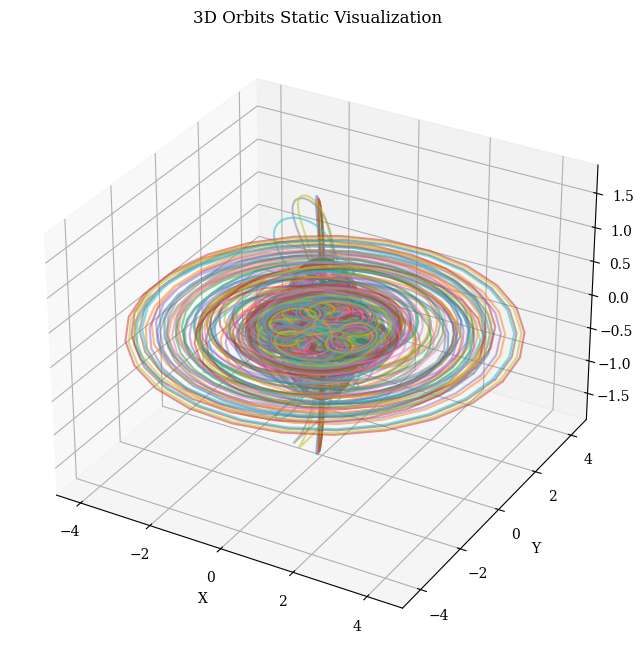

In [9]:
from orbit_generation.visualize import visualize_static_orbits, export_dynamic_orbits_html

visualize_static_orbits(orbit_data[:,1:], show_legend=False)

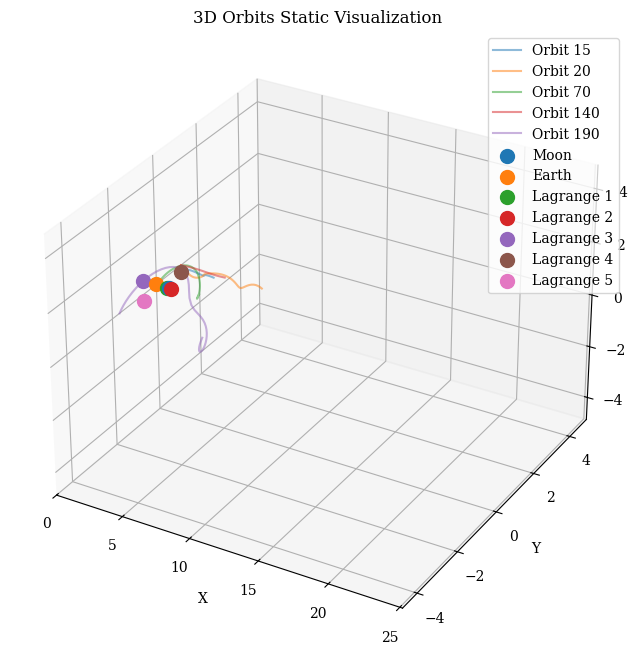

In [7]:
visualize_static_orbits(resampled_orbit_data, orbit_indices=[15,20,70,140,190], point_dict=EM_POINTS)

In [8]:
export_dynamic_orbits_html(data=orbit_data, filename='../data/example_data/example_orbits.html')

FileNotFoundError: [Errno 2] No such file or directory: '../data/example_data/example_orbits.html'

See the dynamic orbit visualziation [`here`](../data/example_data/example_orbits.html)

### 4. Statistics

This module analyzes the orbital data using descriptive statistics.  

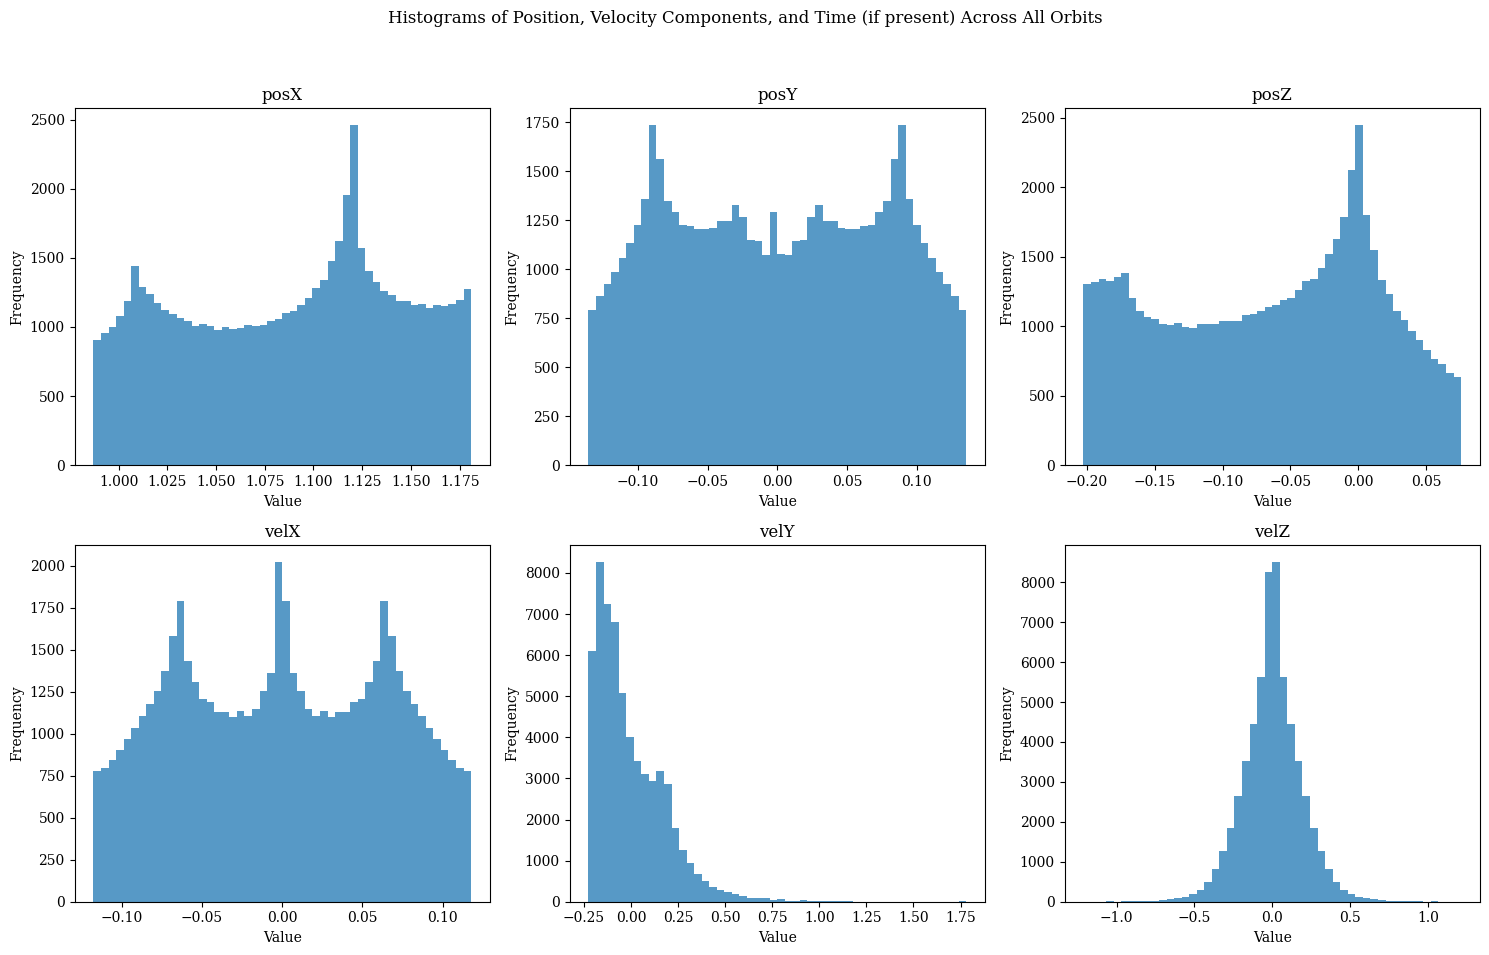

In [11]:
from orbit_generation.stats import plot_histograms_position

plot_histograms_position(orbit_data)

## Experiments

### Generative Discovery

Experiments conducted in [Generative Discovery](../nbs_experiments/01_generative_discovery_em/) folder have been presented in the following papers:
- [SPAICE 2024: Generative Design of Periodic Orbits in the Restricted Three-Body Problem](https://zenodo.org/records/13885649)

#### 1. Exploratory Data Analysis of Earth-Moon Periodic Orbits

This [notebook](../nbs_experiments/01_generative_discovery_em/01_eda_em_system.ipynb) explores the dataset by visualizing the orbits, the proportions within families, the initial conditions, and the distribution of features.

#### 2. 